In [1]:
import numpy as np
import math
import scipy
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.integrate import ode
import matplotlib.pyplot as plt

import sys, os

os.chdir("..")
os.chdir("python scripts")

from particle_class import particle
from amplitude_class import amplitude
from process_class import process
from lookups import lookup

%matplotlib inline

# The Particle Class 

In [2]:
pion = particle(1, 0, 5, 0.1)
alp = particle(0.5, 0, 1, 0.1)
photon = particle(0, 1, 2, 0.1)

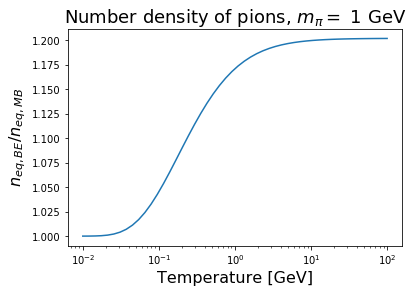

In [3]:
neqlist=[]
approxlist=[]
fastpion = particle(1, 0, 5, 0.1, fast=True)
for i in np.logspace(-1, 2):
    pion.update(i)
    fastpion.update(i)
    neqlist.append(pion.neq())
    approxlist.append(fastpion.neq())
plt.semilogx(np.logspace(-2, 2), np.array(neqlist)/np.array(approxlist))
plt.gca()
plt.xlabel('Temperature [GeV]', fontsize=16)
plt.ylabel(r'$n_{eq, BE}/n_{eq, MB}$', fontsize=16)
plt.ticklabel_format(fontsize=18)
plt.title('Number density of pions, $m_\pi =$ 1 GeV', fontsize=18)


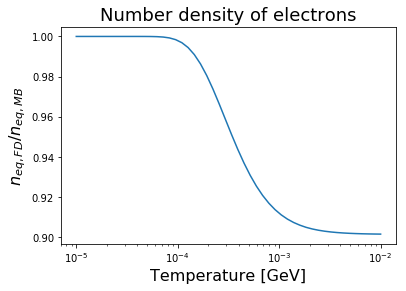

In [3]:
approxlist=[] 
flist=[]
fastelectron = particle(5e-4, 0.5, 2, 0.1, fast=True)
electron = particle(5e-4, 0.5, 2, 0.1)
for i in np.logspace(-5, -2):
    fastelectron.update(i), electron.update(i)
    approxlist.append(fastelectron.neq()), flist.append(electron.neq())

plt.semilogx(np.logspace(-5, -2), np.array(flist)/np.array(approxlist))
plt.gca()
plt.xlabel('Temperature [GeV]', fontsize=16)
plt.ylabel(r'$n_{eq, FD}/n_{eq, MB}$', fontsize=16)
plt.ticklabel_format(fontsize=18)
plt.title('Number density of electrons', fontsize=18)

# The Amplitude and Process Classes

In [3]:
fourpt = amplitude(lambda s:1e-10, s=True)
alpPhotons = amplitude(lambda s: alp.mass**4*4e-10,threept=True)

In [5]:
pion = particle(1, 0, 1, 0.01)
photon = particle(0, 1, 1, 0.01)
MBpion = particle(1, 0, 1, 0.01, fast=True)
wimpamp = amplitude(lambda s:1, s=True)
wimpann=process(wimpamp, i1=pion,i2=pion,f1=photon,f2=photon,nevals=1e5)
wimpann.CrossSection()/(MBpion.neq())**2

0.009670(11)

In [6]:
wimpamp = amplitude(lambda s:1, s=True)
wimpann=process(wimpamp, i1=pion,i2=pion,f1=photon,f2=photon,nevals=1e5)
wimpann.CrossSection()/(MBpion.neq())**2

KeyboardInterrupt: 

In [18]:
photon.mass_update(0)

In [8]:
wimpann_check=process(wimpamp, i1=pion,i2=pion,f1=photon,f2=photon, analytic=True)

In [11]:
1/(2*np.pi)**2

0.025330295910584444

In [9]:
wimpann_check.CrossSection()/(MBpion.neq())**2

0.0091559991493743373

In [4]:
annihilation=process(fourpt, i1=pion,i2=pion,f1=alp,f2=alp,nevals=3e4)
antiannihilation = process(fourpt, i1=alp, i2=alp, f1=pion, f2=pion,nevals=3e4)
transfer = process(fourpt, i1=pion,i2=alp,f1=pion,f2=alp,nonequilibrium=True)
decaytophotons = process(alpPhotons, i1=alp,f1=photon,f2=photon, nevals=3e3, Ecut=50)
photoninversedecay = process(alpPhotons, i1=photon,i2=photon,f1=alp, nevals=3e3)

annihilation_check=process(fourpt, i1=pion,i2=pion,f1=alp,f2=alp, analytic=True)
antiannihilation_check = process(fourpt, i1=alp, i2=alp, f1=pion, f2=pion, analytic=True)
transfer_check = process(fourpt, i1=pion,i2=alp,f1=pion,f2=alp,nonequilibrium=True,  analytic=True)
decaytophotons_check = process(alpPhotons, i1=alp,f1=photon,f2=photon,  analytic=True)
photoninversedecay_check = process(alpPhotons, i1=photon,i2=photon,f1=alp, analytic=True)

In [5]:
tempscan = np.logspace(1, -2., 31)
MBalp = particle(0.5, 0, 1, 0.1, fast=True)

alp.mass_update(0.5)
MBalp.mass_update(0.5)
xsection=[]
approxxsection = []
for i in tempscan:
    alp.update(i)
    photon.update(i)
    MBalp.update(i)
    xsection.append(decaytophotons.CrossSection().val/alp.neq())
    approxxsection.append(1e-10*decaytophotons_check.CrossSection()/MBalp.neq())
    
alp.mass_update(0.1)
MBalp.mass_update(0.1)
xsection2=[]
approxxsection2 = []
for i in tempscan:
    alp.update(i)
    photon.update(i)
    MBalp.update(i)
    xsection2.append(3e-1*decaytophotons.CrossSection().val/alp.neq())
    approxxsection2.append(3e-11*decaytophotons_check.CrossSection()/MBalp.neq())

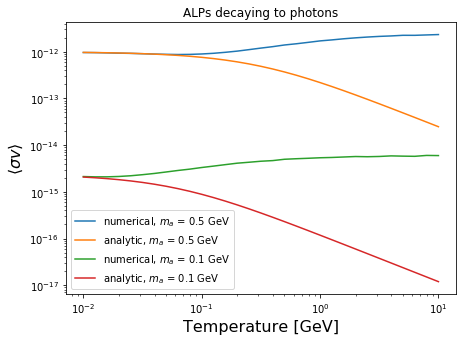

In [6]:
f, ax = plt.subplots()

ax.loglog(tempscan, xsection,label='numerical, $m_a$ = 0.5 GeV')
ax.loglog(tempscan, approxxsection,label='analytic, $m_a$ = 0.5 GeV')
ax.loglog(tempscan, xsection2,label='numerical, $m_a$ = 0.1 GeV')
ax.loglog(tempscan, approxxsection2, label='analytic, $m_a$ = 0.1 GeV')

ax.set_xlabel('Temperature [GeV]', fontsize=16)
ax.set_ylabel(r'$\left< \sigma v \right>$', fontsize=16)
ax.set_title('ALPs decaying to photons')
ax.legend()
f.set_size_inches(7,5)


In [17]:
#check convergence at higher temperatures
highres_decay = process(alpPhotons, i1=alp,f1=photon,f2=photon, nevals=1e4)
higherres_decay = process(alpPhotons, i1=alp,f1=photon,f2=photon, nevals=3e4)

In [15]:
alp.update(10)
photon.update(10)
result =decaytophotons.CrossSection()
print(result.summary())
print('result = %s    Q = %.2f' % (result, result.Q))
result =highres_decay.CrossSection()
print(result.summary())
print('result = %s    Q = %.2f' % (result, result.Q))
result =higherres_decay.CrossSection()
print(result.summary())
print('result = %s    Q = %.2f' % (result, result.Q))
print('ANALYTIC PREDICTION = ', 1e-10*decaytophotons_check.CrossSection())

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   2.202(31)e-12   2.202(31)e-12       0.00     1.00
  2   2.229(70)e-12   2.206(29)e-12       0.12     0.73
  3   2.161(35)e-12   2.189(22)e-12       0.56     0.57
  4   2.172(39)e-12   2.185(19)e-12       0.42     0.74
  5   2.38(20)e-12    2.186(19)e-12       0.56     0.69
  6   2.204(44)e-12   2.189(18)e-12       0.47     0.80
  7   2.254(53)e-12   2.196(17)e-12       0.62     0.71
  8   2.41(16)e-12    2.198(17)e-12       0.77     0.61
  9   2.213(44)e-12   2.200(16)e-12       0.69     0.70
 10   2.232(39)e-12   2.204(14)e-12       0.67     0.73

result = 2.204(14)e-12    Q = 0.73
itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   2.306(24)e-12   2.306(24)e-12       0.00     1.00
  2   2.346(26)e-12   2.324(18)e-12       1.26     0.26
  3   2.349(22)e-12   2.334(14)e-12       1.02     0.36
  4   2.407(

In [14]:
#check convergence in energy cut for integral
decaytophotons_highE = process(alpPhotons, i1=alp,f1=photon,f2=photon, nevals=1e4, Ecut=10)
decaytophotons_higherE = process(alpPhotons, i1=alp,f1=photon,f2=photon, nevals=1e4, Ecut=20)

In [15]:
alp.update(10)
photon.update(10)
result =decaytophotons_highE.CrossSection()
print(result.summary())
print('result = %s    Q = %.2f' % (result, result.Q))
result =decaytophotons_higherE.CrossSection()
print(result.summary())
print('result = %s    Q = %.2f' % (result, result.Q))

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   2.457(65)e-12   2.457(65)e-12       0.00     1.00
  2   2.475(56)e-12   2.467(43)e-12       0.05     0.83
  3   2.516(84)e-12   2.477(38)e-12       0.16     0.86
  4   2.473(31)e-12   2.475(24)e-12       0.11     0.96
  5   2.488(34)e-12   2.479(20)e-12       0.11     0.98
  6   2.408(27)e-12   2.454(16)e-12       1.00     0.42
  7   2.485(34)e-12   2.460(14)e-12       0.94     0.46
  8   2.430(30)e-12   2.454(13)e-12       0.93     0.48
  9   2.482(66)e-12   2.455(13)e-12       0.84     0.57
 10   2.456(39)e-12   2.455(12)e-12       0.74     0.67

result = 2.455(12)e-12    Q = 0.67
itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   2.403(79)e-12   2.403(79)e-12       0.00     1.00
  2   2.43(16)e-12    2.409(71)e-12       0.02     0.88
  3   2.48(12)e-12    2.429(60)e-12       0.16     0.85
  4   2.476(

In [6]:
tempscan = np.logspace(1, -1.5, 10)
MBpion = particle(1, 0, 5, 0.1, fast=True)

alp.mass_update(0.5)
pion.mass_update(1), MBpion.mass_update(1)
xsection=[]
approxxsection = []
for i in tempscan:
    alp.update(i)
    pion.update(i), MBpion.update(i)
    xsection.append(annihilation.CrossSection().val/pion.neq()**2)
    approxxsection.append(1e-10*annihilation_check.CrossSection()/MBpion.neq()**2)
    
alp.mass_update(0.2)
pion.mass_update(0.7),MBpion.mass_update(0.7)
xsection2=[]
approxxsection2 = []
for i in tempscan:
    alp.update(i)
    pion.update(i),MBpion.update(i)
    xsection2.append(3e-1*annihilation.CrossSection().val/pion.neq()**2)
    approxxsection2.append(3e-11*annihilation_check.CrossSection()/MBpion.neq()**2)

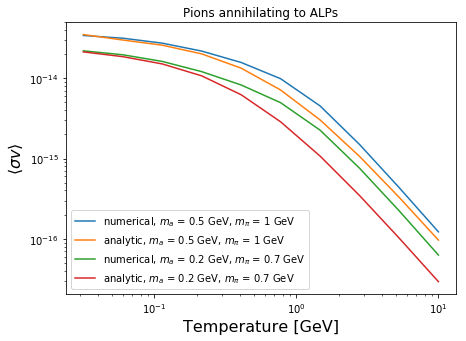

In [7]:
f, ax = plt.subplots()

ax.loglog(tempscan, 0.0335*np.array(xsection),label='numerical, $m_a$ = 0.5 GeV, $m_\pi$ = 1 GeV')
ax.loglog(tempscan, approxxsection,label='analytic, $m_a$ = 0.5 GeV, $m_\pi$ = 1 GeV')
ax.loglog(tempscan, 0.0335*np.array(xsection2),label='numerical, $m_a$ = 0.2 GeV, $m_\pi$ = 0.7 GeV')
ax.loglog(tempscan, approxxsection2, label='analytic, $m_a$ = 0.2 GeV, $m_\pi$ = 0.7 GeV')

ax.set_xlabel('Temperature [GeV]', fontsize=16)
ax.set_ylabel(r'$\left< \sigma v \right>$', fontsize=16)
ax.set_title('Pions annihilating to ALPs')
ax.legend()
f.set_size_inches(7,5)

In [12]:
#check convergence at higher temperatures
highres_annihilation = process(fourpt, i1=pion,i2=pion,f1=alp,f2=alp, nevals=6e4)
higherres_ann = process(fourpt, i1=pion,i2=pion,f1=alp,f2=alp, nevals=1e5)
pion.update(10)
alp.update(10)
print(annihilation.CrossSection())
print(highres_annihilation.CrossSection())
print(higherres_ann.CrossSection())
print(1e-10*annihilation_check.CrossSection()/0.0335)

2.3151(55)e-09
2.3228(33)e-09
2.3171(25)e-09
7.485080231741217e-10


In [13]:
#check convergence at higher temperatures
highE_annihilation = process(fourpt, i1=pion,i2=pion,f1=alp,f2=alp, Ecut=10)
higherE_ann = process(fourpt, i1=pion,i2=pion,f1=alp,f2=alp, Ecut=20)
pion.update(10)
alp.update(10)
print(annihilation.CrossSection())
print(highE_annihilation.CrossSection())
print(higherE_ann.CrossSection())
print(1e-10*annihilation_check.CrossSection()/0.0335)

2.3178(54)e-09
8.514(71)e-09
8.604(70)e-09
7.485080231741217e-10


In [5]:
electron = particle(5e-4, 1/2, 2, 0.1)
alpElectrons = amplitude(lambda s: 2*alp.mass**2*electron.mass**2,threept=True)
decaytoelectrons = process(alpElectrons, i1=alp,f1=electron,f2=electron, nevals=3e3)
decaytoelectrons_check = process(alpElectrons, i1=alp,f1=electron,f2=electron, analytic=True)

In [4]:
tempscan = np.logspace(1, -2, 30)
MBalp = particle(0.5, 0, 1, 0.1, fast=True)

alp.mass_update(1), MBalp.mass_update(1)
xsection=[]
approxxsection = []
for i in tempscan:
    alp.update(i),MBalp.update(i)
    electron.update(i)
    xsection.append(decaytoelectrons.CrossSection().val/alp.neq())
    approxxsection.append(decaytoelectrons_check.CrossSection()/MBalp.neq())
    
alp.mass_update(0.1),MBalp.mass_update(0.1)
xsection2=[]
approxxsection2 = []
for i in tempscan:
    alp.update(i), MBalp.update(i)
    electron.update(i)
    xsection2.append(decaytoelectrons.CrossSection().val/alp.neq())
    approxxsection2.append(decaytoelectrons_check.CrossSection()/MBalp.neq())

alp.mass_update(0.3),MBalp.mass_update(0.3)
xsection3=[]
approxxsection3 = []
for i in tempscan:
    alp.update(i), MBalp.update(i)
    electron.update(i)
    xsection3.append(decaytoelectrons.CrossSection().val/alp.neq())
    approxxsection3.append(decaytoelectrons_check.CrossSection()/MBalp.neq())

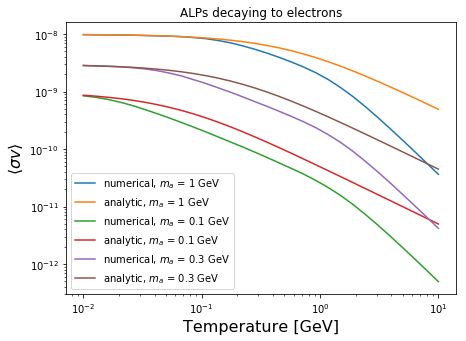

In [5]:
f, ax = plt.subplots()

ax.loglog(tempscan, xsection,label='numerical, $m_a$ = 1 GeV')
ax.loglog(tempscan, approxxsection,label='analytic, $m_a$ = 1 GeV')
ax.loglog(tempscan, np.array(xsection2),label='numerical, $m_a$ = 0.1 GeV')
ax.loglog(tempscan, np.array(approxxsection2), label='analytic, $m_a$ = 0.1 GeV')
ax.loglog(tempscan, np.array(xsection3),label='numerical, $m_a$ = 0.3 GeV')
ax.loglog(tempscan, np.array(approxxsection3), label='analytic, $m_a$ = 0.3 GeV')

ax.set_xlabel('Temperature [GeV]', fontsize=16)
ax.set_ylabel(r'$\left< \sigma v \right>$', fontsize=16)
ax.set_title('ALPs decaying to electrons')
ax.legend()
f.set_size_inches(7,5)

In [6]:
tempscan = np.logspace(1, -2, 30)
MBalp = particle(0.5, 0, 1, 0.1, fast=True)
MBpion = particle(1, 0, 5, 0.1, fast=True)

alp.mass_update(0.3), MBalp.mass_update(0.3)
electron.update(0.1)
xsection=[]
approxxsection = []
for i in tempscan:
    alp.update(i),MBalp.update(i)
    #electron.update(i)
    xsection.append(decaytoelectrons.CrossSection().val/alp.neq())
    approxxsection.append(decaytoelectrons_check.CrossSection()/MBalp.neq())
    
tempscan = np.logspace(1, -2, 10)
alp.mass_update(0.5)
alp.update(1)
pion.mass_update(1), MBpion.mass_update(1)
xsection2=[]
approxxsection2 = []
for i in tempscan:
    #alp.update(i)
    pion.update(i), MBpion.update(i)
    xsection2.append(annihilation.CrossSection().val/pion.neq()**2)
    approxxsection2.append(1e-10*annihilation_check.CrossSection()/MBpion.neq()**2)
    
tempscan = np.logspace(1, -2, 30)
alp.mass_update(0.5), MBalp.mass_update(0.5)
photon.update(1)
xsection3=[]
approxxsection3 = []
for i in tempscan:
    alp.update(i)
    #photon.update(i)
    MBalp.update(i)
    xsection3.append(decaytophotons.CrossSection().val/alp.neq())
    approxxsection3.append(1e-10*decaytophotons_check.CrossSection()/MBalp.neq())

In [10]:
tempscan = np.logspace(1, -2, 30)
alp.mass_update(0.5), MBalp.mass_update(0.5)
photon.update(1)
xsection3=[]
approxxsection3 = []
for i in tempscan:
    alp.update(i)
    #photon.update(i)
    MBalp.update(i)
    xsection3.append(decaytophotons.CrossSection().val/alp.neq())
    approxxsection3.append(1e-10*decaytophotons_check.CrossSection()/MBalp.neq())

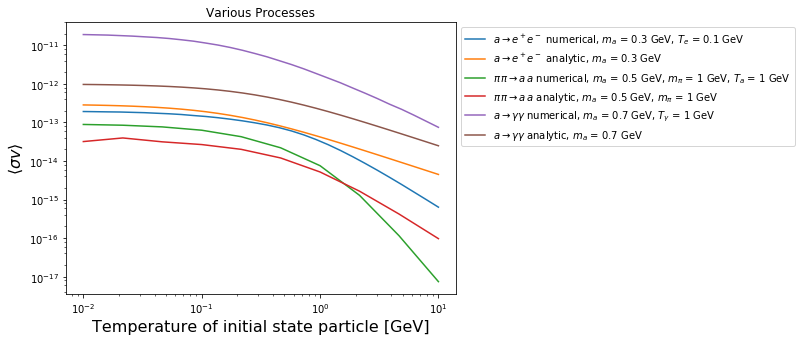

In [22]:
f, ax = plt.subplots()

ax.loglog(tempscan, 1e-4*np.array(xsection),label=r'$a\rightarrow e^+ e^-$ numerical, $m_a$ = 0.3 GeV, $T_e$ = 0.1 GeV')
ax.loglog(tempscan, 1e-4*np.array(approxxsection),label=r'$a\rightarrow e^+ e^-$ analytic, $m_a$ = 0.3 GeV')
ax.loglog(np.logspace(1, -2, 10), 0.0335*np.array(xsection2),label=r'$\pi\, \pi \rightarrow a \,a$ numerical, $m_a$ = 0.5 GeV, $m_\pi$ = 1 GeV, $T_a$ = 1 GeV')
ax.loglog(np.logspace(1, -2, 10), np.array(approxxsection2), label=r'$\pi \,\pi\rightarrow a \,a$ analytic, $m_a$ = 0.5 GeV, $m_\pi$ = 1 GeV')
ax.loglog(tempscan, np.array(xsection3),label=r'$a\rightarrow \gamma \gamma$ numerical, $m_a$ = 0.7 GeV, $T_\gamma$ = 1 GeV')
ax.loglog(tempscan, np.array(approxxsection3), label=r'$a\rightarrow \gamma \gamma$ analytic, $m_a$ = 0.7 GeV')

ax.set_xlabel('Temperature of initial state particle [GeV]', fontsize=16)
ax.set_ylabel(r'$\left< \sigma v \right>$', fontsize=16)
ax.set_title('Various Processes')
ax.legend(bbox_to_anchor=(1, 1))
f.set_size_inches(7,5)

# Generating Lookup Tables

In [1]:
from lookups import lookup
from table_scan import lookup_scan

ImportError: No module named 'lookups'

In [6]:
lookup_scan(1, 0.01, np.logspace(-2, 0, 11))

[[1.7650350381915891e-96, 1.7191705788483289e-96, 1.7361453983445725e-96, 1.7448655027403941e-96, 1.7495991306872547e-96, 1.6910735334219266e-96, 1.6326646959429986e-96, 1.7558423960777654e-96, 2.033847348628213e-96, 2.6615045340763853e-96, 4.272916362996774e-96], [7.78606788745227e-64, 7.950828065539653e-64, 7.903882622401083e-64, 7.82239646019804e-64, 8.007770385494554e-64, 7.761861299923245e-64, 7.816651144909103e-64, 8.186412465352416e-64, 9.083340602433753e-64, 1.224389905924049e-63, 1.9437754695042083e-63], [5.408842063810895e-43, 5.343628684317191e-43, 5.373357603003033e-43, 5.357327312858031e-43, 5.378878028774133e-43, 5.357789385271058e-43, 5.413946433678599e-43, 5.53144012301474e-43, 6.223156335786039e-43, 8.178464447064557e-43, 1.2590441054696328e-42], [1.2652500446089268e-29, 1.2641669374680476e-29, 1.2474245379863147e-29, 1.2370497010957111e-29, 1.2537918387903086e-29, 1.2436545571289954e-29, 1.2340501061820497e-29, 1.290368405446039e-29, 1.42940026090958e-29, 1.9076925316

# Running the ODE Solver

In [1]:
import numpy as np
import math
import scipy
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.integrate import ode
import matplotlib.pyplot as plt

import sys, os

os.chdir("..")
os.chdir("python scripts")

from particle_class import particle
from amplitude_class import amplitude
from process_class import process
from lookups import lookup

%matplotlib inline

In [2]:
pion = particle(1, 0, 5, 0.1)
alp = particle(0.5, 0, 1, 0.1)
photon = particle(0, 1, 2, 0.1)

In [3]:
from ode_helper import *

In [4]:
os.chdir("..")
os.chdir("lookup tables")

try:
    import cPickle as pickle
except ImportError:
    import pickle
    
with open('annihilation_mpi_1_ma_0.01.pkl', 'rb') as f:
    ann_lookup = pickle.load(f)
    
with open('ann_transfer_mpi_1_ma_0.01.pkl', 'rb') as f:
    ann_transfer_lookup = pickle.load(f)
    
with open('elastic_mpi_1_ma_0.01.pkl', 'rb') as f:
    elastic_lookup = pickle.load(f)
    
with open('decaytophotons_mpi_1_ma_0.01.pkl', 'rb') as f:
    agg_lookup = pickle.load(f)
    
with open('decay_transfer_mpi_1_ma_0.01.pkl', 'rb') as f:
    agg_transfer_lookup = pickle.load(f)
    
pion.mass_update(1)
alp.mass_update(0.1)

wzw = process(1, i1=pion, i2=pion,i3=pion,f1=pion,f2=pion, analytic=True)

In [16]:
pion.update(1.001)

In [17]:
alp.update(1)

In [13]:
pion.mass

1

In [43]:
wzw = process(1, i1=fp, i2=fp,i3=fp,f1=fp,f2=fp, analytic=True)

In [40]:
fp = particle(1, 0, 5, .10001, fast=True)

In [41]:
fa = particle(0.1, 0, 1, 0.1+1e-6, fast=True)

In [7]:
alp.mass_update(0.1)

In [45]:
wzw.CrossSection()/fp.neq()**3/.10001**2

0.078914969714913075

In [42]:
wzw.CrossSection()/fp.neq()**3/.5005**2

1.3696466696879971e+17

In [52]:
1e-24/fp.neq()/fa.neq()

2.2270042552813636e-14

In [51]:
derivatives(10, [fp,fa], [1e-2,1e-3,1e-4,1e-5], sigma_wzw=1e-10*wzw.CrossSection(), Cprime=-1e-24)

[array([ 77.54641081,  -6.51699722,  -1.45226172,   0.44183463]),
 [[83.30711292887221,
   -13.930246854081702,
   77.51675376423815,
   261.28869242571955],
  [-0.5549129982929673,
   -10.903044352686152,
   -6.588821807164777,
   -22.209194155062683],
  [-1.4509206089804136,
   -17.069919155423356,
   -1.7273024008925202,
   1.3177352684273016],
  [0.43044593523604896,
   5.064148423960488,
   0.08163964851276584,
   0.11367377800583811]],
 -1.1854132249218539e-08,
 0.0,
 0.0]

In [16]:
os.chdir("..")
os.chdir("python scripts")

f = open('jacobian11.txt', 'r')
jac11 = f.read()
f.close()

In [7]:
alp.mass_update(0.01)

In [9]:
ascan = np.linspace(1, 100, int(3e4))
step = ascan[1]-ascan[0]
upiscan,uascan,rhopiscan,rhoascan,derivscan,tempscan,wzwscan,annscan,decayscan = [0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan)


pion.update(1/ascan[0], mu=0)
alp.update(1/ascan[0], mu=0)
photon.update(1/ascan[0], mu=0)

upi, ua, dTpi, dTa = 0, 0, 0, 0

counter = 0
for a in ascan:
    index = list(ascan).index(a)
    
    if counter ==0:
        jac = 2*np.diag([1, 1, 1, 1])
        d = np.array([0, 0, 0, 0])
        mupi = upi+1
        mua = ua+1
        wzwterm=0
        annterm=0
        decayterm=0
    else:
        mupi = upi+1
        mua = ua+1
        
        photon.update(1/a, mu=0)
        pion.update((dTpi+1)/a, mu=(dTpi+1)/a*math.log(upi+1))
        alp.update((dTa+1)/a, mu=(dTa+1)/a*math.log(ua+1))
        tempscan[index] = [pion.temp, alp.temp]
        
        dialup_factor=1e-15
        dialup_photons=1e-7
        
        sigma_pipiaa = dialup_factor*math.exp(ann_lookup(pion.temp, alp.temp))
        sigma_agg = dialup_photons*math.exp(agg_lookup(alp.temp, 1/a))
        dE_agg = dialup_photons*math.exp(agg_transfer_lookup(1/a, alp.temp))
        dE_pipiaa = dialup_factor*math.exp(ann_transfer_lookup(pion.temp, alp.temp))
        if pion.temp>alp.temp:
            Cprime = -dialup_factor*math.exp(elastic_lookup(pion.temp, alp.temp))
        else:
            Cprime = dialup_factor*math.exp(elastic_lookup(pion.temp, alp.temp))
        
        #derivs = lambda k: derivatives(a, [pion, alp], k, sigma_wzw=1e10*wzw.CrossSection(),Cprime=Cprime,\
        #                    sigma_pipiaa=sigma_pipiaa,sigma_agg=sigma_agg,dE_agg=dE_agg,dE_pipiaa=dE_pipiaa)
        
        [d, jac, wzwterm, annterm, decayterm] =derivatives(a, [pion, alp], [upi,dTpi,ua,dTa], sigma_wzw=1e10*wzw.CrossSection(),Cprime=Cprime,\
                            sigma_pipiaa=sigma_pipiaa,sigma_agg=sigma_agg,dE_agg=dE_agg,dE_pipiaa=dE_pipiaa)

    matrix = np.linalg.inv(np.identity(4) - step*np.array(jac))
    derivscan[index] = d
    wzwscan[index] = wzwterm
    annscan[index] = annterm
    decayscan[index] = decayterm
    counter = counter+1
    
    upinew = upi+ step* np.dot(matrix, d)[0]
    uanew = ua+ step* np.dot(matrix, d)[2]
    
    dTpinew = dTpi+ step*np.dot(matrix, d)[1]
    dTanew = dTa+ step*np.dot(matrix, d)[3]

    upiscan[index] = upi
    rhopiscan[index] = dTpi
    uascan[index] = ua
    rhoascan[index] = dTa
    
    if index%100 ==0:
        #print(matrix)
        print("mupi = " ,upi, d[0])
        print("mua = " ,ua, d[2])
        print("dTpi = " ,dTpi, d[1])
        print("dTa = " ,dTa, d[3])
        print(photon.temp, pion.temp, alp.temp)
        print('-----------------')
        
    if uanew>0:
        ua = uanew
    #else:
    #    ua = 0
    if upinew>0:
        upi = upinew
    #else: 
    #    upi=0
        
    if dTpinew>0:
        dTpi = dTpinew
    #else:
    #    dTpi = 0
    if dTanew>0:
        dTa = dTanew
    #else:
    #    dTa = 0

mupi =  0 0
mua =  0 0
dTpi =  0 0
dTa =  0 0
1.0 1.0 1.0
-----------------
mupi =  1.01654551276e-28 0.00383679866337
mua =  2.22719673898e-09 -18380.250945
dTpi =  0.000567912634647 0.120046625712
dTa =  0.000852242721717 -241.568622813
0.751873480538 0.752300478988 0.75251425924
-----------------
mupi =  1.01654551276e-28 -0.290263440504
mua =  2.15188190342e-09 -42676.6028525
dTpi =  3.95067845387e-06 0.206364854905
dTa =  0.000852242721717 -706.97692064
0.602401654652 0.602404034547 0.602915047077
-----------------
mupi =  6.59941259177e-21 -1197253051.13
mua =  2.28550611779e-07 -109.394185622
dTpi =  2.39410617742 10641.802101
dTa =  216.687285248 -4.36235137363
0.502504229552 1.7055527097 109.388781557
-----------------
mupi =  6.59941259177e-21 -377003627.498
mua =  2.71457294932e-07 -222.346820824
dTpi =  2.3941043568 17010.588139
dTa =  216.687221919 -10.2930677638
0.431026307849 1.46294826937 93.8289195296
-----------------


KeyboardInterrupt: 

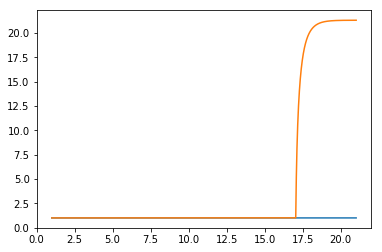

In [48]:
plt.plot(ascan[0:counter], (np.array([1]*counter)+upiscan[0:counter])*ascan[0:counter]**0, label='npi*a^3')
plt.plot(ascan[0:counter],(np.array([1]*counter)+uascan[0:counter])*ascan[0:counter]**0, label='npi_eq*a^3')

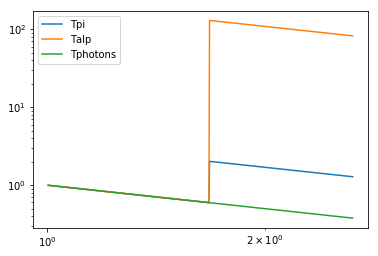

In [10]:
plt.loglog(ascan[1:counter], np.array(tempscan[1:counter])[:,0], label='Tpi')
plt.loglog(ascan[1:counter], np.array(tempscan[1:counter])[:,1],label='Talp')
#plt.loglog(ascan[1:counter], np.array(tempscan[1:counter])[:,0], label='Tpi')
plt.loglog(ascan[1:counter], 1/np.array(ascan[1:counter]),label='Tphotons')
plt.legend()

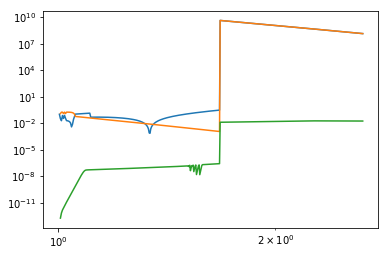

In [11]:
plt.loglog(ascan[0:counter],np.abs(np.array(derivscan[0:counter])[:,0]))
plt.loglog(ascan[0:counter],np.abs(np.array(wzwscan[0:counter])))
plt.loglog(ascan[0:counter],np.abs(np.array(annscan[0:counter])))

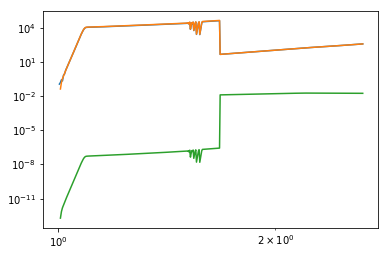

In [12]:
plt.loglog(ascan[0:counter],np.abs(np.array(derivscan[0:counter])[:,2]))
plt.loglog(ascan[0:counter],np.abs(decayscan[0:counter]))
plt.loglog(ascan[0:counter],np.abs(np.array(annscan[0:counter])))

In [5]:
with open('annihilation_lookup_test.pkl', 'rb') as f:
    ann_lookup = pickle.load(f)
    
with open('ann_forward_lookup_test.pkl', 'rb') as f:
    ann_transfer_lookup = pickle.load(f)
    
with open('el_sanity_lookup_test.pkl', 'rb') as f:
    elastic_lookup = pickle.load(f)
    
with open('decaytophotons_lookup_test.pkl', 'rb') as f:
    agg_lookup = pickle.load(f)
    
with open('alp_decay_energy_lookup_test.pkl', 'rb') as f:
    agg_transfer_lookup = pickle.load(f)
    
alp.mass_update(0.2)

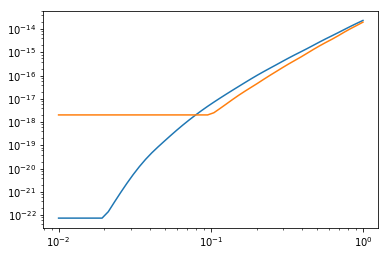

In [67]:
plt.loglog(np.logspace(-2, 0), [np.exp(agg_lookup(i, i))[0] for i in np.logspace(-2, 0)])
plt.loglog(np.logspace(-2, 0), [np.exp(agg_transfer_lookup(i, i))[0] for i in np.logspace(-2, 0)])

In [35]:
ascan = np.linspace(1, 100, int(3e4))
step = ascan[1]-ascan[0]
upiscan,uascan,rhopiscan,rhoascan,derivscan,tempscan,wzwscan,annscan,decayscan = [0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan)


pion.update(1/ascan[0], mu=0)
alp.update(1/ascan[0], mu=0)
photon.update(1/ascan[0], mu=0)

upi, ua, dTpi, dTa = 0, 0, 0, 0

counter = 0
for a in ascan:
    index = list(ascan).index(a)
    
    if counter ==0:
        jac = 2*np.diag([1, 1, 1, 1])
        d = np.array([0, 0, 0, 0])
        mupi = upi+1
        mua = ua+1
        wzwterm=0
        annterm=0
        decayterm=0
    else:
        mupi = upi+1
        mua = ua+1
        
        photon.update(1/a, mu=0)
        pion.update((dTpi+1)/a, mu=(dTpi+1)/a*math.log(upi+1))
        alp.update((dTa+1)/a, mu=(dTa+1)/a*math.log(ua+1))
        tempscan[index] = [pion.temp, alp.temp]
        
        dialup_factor=1e-2
        dialup_photons=1e-1
        
        sigma_pipiaa = dialup_factor*math.exp(ann_lookup(pion.temp, alp.temp))
        sigma_agg = dialup_photons*math.exp(agg_lookup(alp.temp, 1/a))
        dE_agg = dialup_photons*math.exp(agg_transfer_lookup(1/a, alp.temp))
        dE_pipiaa = dialup_factor*math.exp(ann_transfer_lookup(pion.temp, alp.temp))
        if pion.temp>alp.temp:
            Cprime = -dialup_factor*math.exp(elastic_lookup(pion.temp, alp.temp))
        else:
            Cprime = dialup_factor*math.exp(elastic_lookup(pion.temp, alp.temp))
        
        #derivs = lambda k: derivatives(a, [pion, alp], k, sigma_wzw=1e10*wzw.CrossSection(),Cprime=Cprime,\
        #                    sigma_pipiaa=sigma_pipiaa,sigma_agg=sigma_agg,dE_agg=dE_agg,dE_pipiaa=dE_pipiaa)
        
        [d, jac, wzwterm, annterm, decayterm]  =derivatives(a, [pion, alp], [upi,dTpi,ua,dTa], sigma_wzw=1e10*wzw.CrossSection(),Cprime=Cprime,\
                            sigma_pipiaa=sigma_pipiaa,sigma_agg=sigma_agg,dE_agg=dE_agg,dE_pipiaa=dE_pipiaa)
        
        #derivs = lambda k: derivatives(a, [pion, alp], k, wzw=1e10*wzw.CrossSection(), annihil=ann_lookup,\
        #            decay =agg_lookup, transfer=elastic_lookup,\
        #            annihil_E=ann_transfer_lookup, decay_E=agg_transfer_lookup,\
        #            dialup_factor=1e-3,dialup_photons=1e-1)
        
        #d=derivs([upi,dTpi,ua,dTa])
        #jac = jacobian([pion,alp], derivs,[upi,dTpi,ua,dTa])

    matrix = np.linalg.inv(np.identity(4) - step*np.array(jac))
    derivscan[index] = list(d)
    wzwscan[index] = wzwterm
    annscan[index] = annterm
    decayscan[index] = decayterm
    counter = counter+1
    
    upinew = upi+ step* np.dot(matrix, d)[0]
    uanew = ua+ step* np.dot(matrix, d)[2]
    
    dTpinew = dTpi+ step*np.dot(matrix, d)[1]
    dTanew = dTa+ step*np.dot(matrix, d)[3]

    upiscan[index] = upi
    rhopiscan[index] = dTpi
    uascan[index] = ua
    rhoascan[index] = dTa
    
    if index%100 ==0:
        print("mupi = " ,upi, d[0])
        print("mua = " ,ua, d[2])
        print("dTpi = " ,dTpi, d[1])
        print("dTa = " ,dTa, d[3])
        print(photon.temp, pion.temp, alp.temp)
        print('-----------------')


    if uanew>0:
        ua = uanew
    #else:
    #    ua = 0
    if upinew>0:
        upi = upinew
    #else: 
    #    upi=0
        
    if dTpinew>0:
        dTpi = dTpinew
    #else:
    #    dTpi = 0
    if dTanew>0:
        dTa = dTanew
    #else:
    #    dTa = 0

mupi =  0 0
mua =  0 0
dTpi =  0 0
dTa =  0 0
1.0 1.0 1.0
-----------------
mupi =  1.43054074804e-26 -11.5858253408
mua =  4.78406631685e-05 35.4121118006
dTpi =  0.00994992904441 3.12028084505
dTa =  0.0101946773223 -14.606879175
0.751873480538 0.75935456832 0.75953858806
-----------------
mupi =  1.43054074804e-26 -10.3825528845
mua =  0.000120115684604 21.0115987454
dTpi =  0.0209149708394 3.02013246289
dTa =  0.0270549687369 -14.6626028632
0.602401654652 0.615000867692 0.618699612585
-----------------
mupi =  1.26118494947e-24 -4.74716304731
mua =  0.000300828208402 -35.5431519239
dTpi =  0.0342299989067 0.537599272865
dTa =  0.0885784756528 -7.90477616091
0.502504229552 0.51970494878 0.547015288214
-----------------
mupi =  7.10328455762e-26 -4.78118432012
mua =  7.47032721731e-05 0.479283978149
dTpi =  0.0494995655666 1.33927438585
dTa =  0.142603198439 -5.61807002912
0.431026307849 0.452361922836 0.49249203796
-----------------
mupi =  7.10328455762e-26 -3.23717403506
mua =  5.

KeyboardInterrupt: 

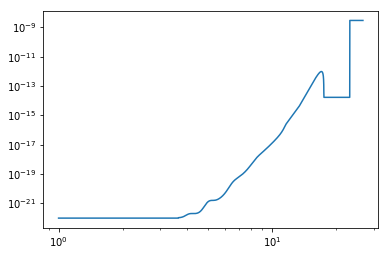

In [36]:
plt.loglog(ascan[0:counter], (np.array([1e-22]*counter)+upiscan[0:counter]), label='npi*a^3')
plt.plot(ascan[0:counter],(np.array([1]*counter)+uascan[0:counter])*ascan[0:counter]**0, label='npi_eq*a^3')

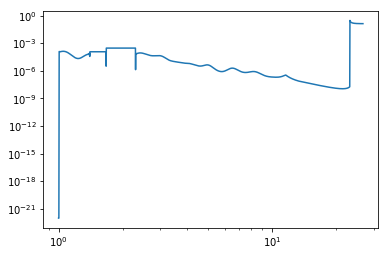

In [38]:
plt.loglog(ascan[0:counter], (np.array([1e-22]*counter)+uascan[0:counter]), label='npi*a^3')

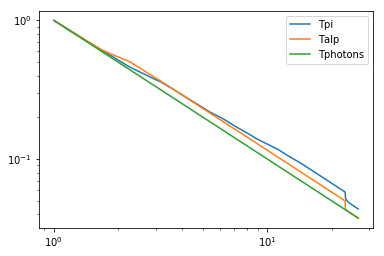

In [37]:
plt.loglog(ascan[1:counter], np.array(tempscan[1:counter])[:,0], label='Tpi')
plt.loglog(ascan[1:counter], np.array(tempscan[1:counter])[:,1],label='Talp')
#plt.loglog(ascan[1:counter], np.array(tempscan[1:counter])[:,0], label='Tpi')
plt.loglog(ascan[1:counter], 1/np.array(ascan[1:counter]),label='Tphotons')
plt.legend()

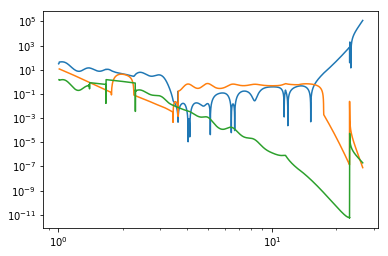

In [40]:
plt.loglog(ascan[0:counter],np.abs(np.array(derivscan[0:counter])[:,0]))
plt.loglog(ascan[0:counter],np.abs(np.array(wzwscan[0:counter])))
plt.loglog(ascan[0:counter],np.abs(np.array(annscan[0:counter])))
#plt.loglog(ascan[0:counter],decayscan[0:counter])

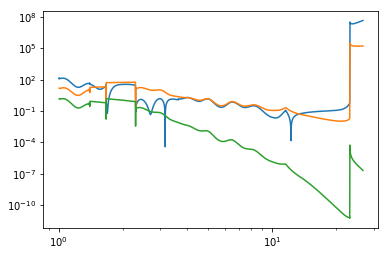

In [41]:
plt.loglog(ascan[0:counter],np.abs(np.array(derivscan[0:counter])[:,2]))
plt.loglog(ascan[0:counter],np.abs(decayscan[0:counter]))
plt.loglog(ascan[0:counter],np.abs(np.array(annscan[0:counter])))

#plt.loglog(ascan[0:counter],np.abs(np.array(derivscan[0:counter])[:,0]))
#plt.loglog(ascan[0:counter],np.abs(np.array(wzwscan[0:counter])))
#plt.loglog(ascan[0:counter],np.abs(np.array(annscan[0:counter])))

In [5]:
fourpt = amplitude(lambda s:1, s=True)
alpPhotons = amplitude(lambda s: alp.mass**4*4,threept=True)

In [6]:
ann_an=process(fourpt, i1=pion,i2=pion,f1=alp,f2=alp, analytic=True)
#antiannihilation_check = process(fourpt, i1=alp, i2=alp, f1=pion, f2=pion, analytic=True)
#transfer_check = process(fourpt, i1=pion,i2=alp,f1=pion,f2=alp,nonequilibrium=True,  analytic=True)
decay_an = process(alpPhotons, i1=alp,f1=photon,f2=photon,  analytic=True)

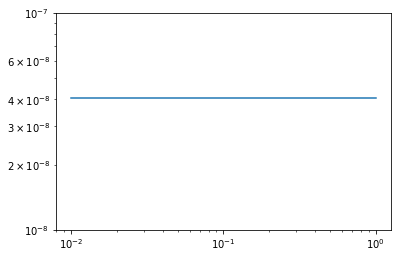

In [13]:
rawr = []
for i in np.logspace(-2, 0):
    alp.update(i)
    rawr.append(decay_an.CrossSection()/(alp.temp * scipy.special.kn(1, alp.mass/alp.temp)))
plt.loglog(np.logspace(-2, 0), rawr)

In [7]:
ascan = np.linspace(1, 100, int(3e4))
step = ascan[1]-ascan[0]
upiscan,uascan,rhopiscan,rhoascan,derivscan,tempscan,wzwscan,annscan,decayscan = [0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan),[0]*len(ascan)

pion.update(1/ascan[0], mu=0)
alp.update(1/ascan[0], mu=0)
photon.update(1/ascan[0], mu=0)

upi, ua, dTpi, dTa = 0, 0, 0, 0

counter = 0
for a in ascan:
    index = list(ascan).index(a)
    
    if counter ==0:
        jac = 2*np.diag([1, 1, 1, 1])
        d = np.array([0, 0, 0, 0])
        mupi = upi+1
        mua = ua+1
        wzwterm=0
        annterm=0
        decayterm=0
    else:
        mupi = upi+1
        mua = ua+1
        
        photon.update(1/a, mu=0)
        pion.update((dTpi+1)/a, mu=(dTpi+1)/a*math.log(upi+1))
        alp.update((dTa+1)/a, mu=(dTa+1)/a*math.log(ua+1))
        tempscan[index] = [pion.temp, alp.temp]
        
        dialup_factor=1e-14
        dialup_photons=1e-6
        
        sigma_pipiaa = dialup_factor*ann_an.CrossSection()
        sigma_agg = dialup_photons*decay_an.CrossSection()
        dE_agg = dialup_photons*decay_an.CrossSection()*alp.temp
        dE_pipiaa = dialup_factor*ann_an.CrossSection()*pion.mass
        #if pion.temp>alp.temp:
        Cprime = dialup_factor*(alp.mass* alp.temp-pion.temp)*a*ann_an.CrossSection()#-dialup_factor*math.exp(elastic_lookup(pion.temp, alp.temp))
        #else:
        #    Cprime = (-alp.temp-pion.temp)*ann_an.CrossSection()#dialup_factor*math.exp(elastic_lookup(pion.temp, alp.temp))
        
        #derivs = lambda k: derivatives(a, [pion, alp], k, sigma_wzw=1e10*wzw.CrossSection(),Cprime=Cprime,\
        #                    sigma_pipiaa=sigma_pipiaa,sigma_agg=sigma_agg,dE_agg=dE_agg,dE_pipiaa=dE_pipiaa)
        
        [d, jac, wzwterm, annterm, decayterm] =derivatives(a, [pion, alp], [upi,dTpi,ua,dTa], sigma_wzw=1e10*wzw.CrossSection(),Cprime=Cprime,\
                            sigma_pipiaa=sigma_pipiaa,sigma_agg=sigma_agg,dE_agg=dE_agg,dE_pipiaa=dE_pipiaa)

    matrix = np.linalg.inv(np.identity(4) - step*np.array(jac))
    derivscan[index] = d
    wzwscan[index] = wzwterm
    annscan[index] = annterm
    decayscan[index] = decayterm
    counter = counter+1
    
    upinew = upi+ step* np.dot(matrix, d)[0]
    uanew = ua+ step* np.dot(matrix, d)[2]
    
    dTpinew = dTpi+ step*np.dot(matrix, d)[1]
    dTanew = dTa+ step*np.dot(matrix, d)[3]

    upiscan[index] = upi
    rhopiscan[index] = dTpi
    uascan[index] = ua
    rhoascan[index] = dTa
    
    if index%100 ==0:
        #print(matrix)
        print("mupi = " ,upi, d[0])
        print("mua = " ,ua, d[2])
        print("dTpi = " ,dTpi, d[1])
        print("dTa = " ,dTa, d[3])
        print(photon.temp, pion.temp, alp.temp)
        print('-----------------')
        
    #if uanew>0:
    ua = uanew
    #else:
    #    ua = 0
    #if upinew>0:
    upi = upinew
    #else: 
    #    upi=0
        
    #if dTpinew>0:
    dTpi = dTpinew
    #else:
    #    dTpi = 0
    #if dTanew>0:
    dTa = dTanew
    #else:
    #    dTa = 0

mupi =  0 0
mua =  0 0
dTpi =  0 0
dTa =  0 0
1.0 1.0 1.0
-----------------


ValueError: math domain error

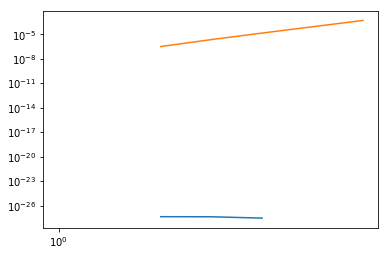

In [12]:
plt.loglog(ascan[0:counter], (np.array([0]*counter)+upiscan[0:counter]), label='npi*a^3')
plt.plot(ascan[0:counter],(np.array([0]*counter)+uascan[0:counter])*ascan[0:counter]**0, label='npi_eq*a^3')

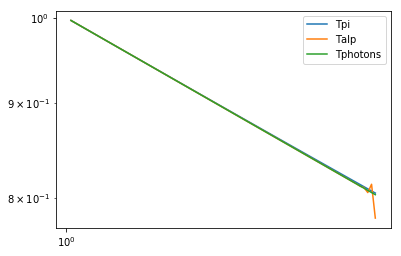

In [8]:
plt.loglog(ascan[1:counter], np.array(tempscan[1:counter])[:,0], label='Tpi')
plt.loglog(ascan[1:counter], np.array(tempscan[1:counter])[:,1],label='Talp')
#plt.loglog(ascan[1:counter], np.array(tempscan[1:counter])[:,0], label='Tpi')
plt.loglog(ascan[1:counter], 1/np.array(ascan[1:counter]),label='Tphotons')
plt.legend()

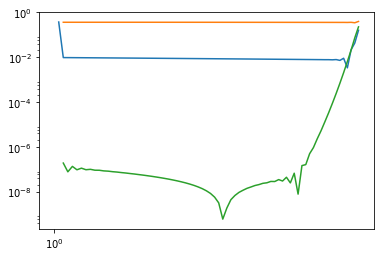

In [9]:
plt.loglog(ascan[0:counter],np.abs(np.array(derivscan[0:counter])[:,0]))
plt.loglog(ascan[0:counter],np.abs(np.array(wzwscan[0:counter])))
plt.loglog(ascan[0:counter],np.abs(np.array(annscan[0:counter])))
#plt.loglog(ascan[0:counter],decayscan[0:counter])

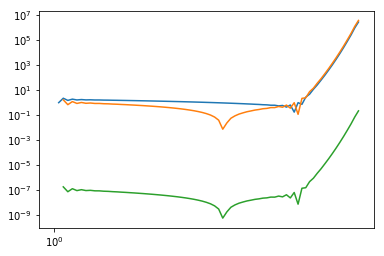

In [10]:
plt.loglog(ascan[0:counter],np.abs(np.array(derivscan[0:counter])[:,2]))
plt.loglog(ascan[0:counter],np.abs(np.array(decayscan[0:counter])))
plt.loglog(ascan[0:counter],np.abs(np.array(annscan[0:counter])))
#plt.loglog(ascan[0:counter],decayscan[0:counter])